[View in Colaboratory](https://colab.research.google.com/github/maticvl/dataHacker/blob/master/005_Logistic_Regression_.ipynb)

In [0]:
# import libraries we will need in the following code

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

Our train set will have 2000 examples, and our test set will have 1000 examples

$ X_{train} = \begin{bmatrix} X_{class\enspace0\enspace train}  \\ X_{class\enspace1\enspace train} \end{bmatrix} =
\begin{bmatrix} \color{Blue} {feature1} & \color{Blue} {feature2} \\ \color{Blue} \vdots & \color{Blue} \vdots \\ 
\color{Orange} {feature1} & \color{Orange} {feature2} \\ \color{Orange} \vdots & \color{Orange} \vdots 
\end{bmatrix} \enspace\enspace\enspace $ 
$ X_{test} = \begin{bmatrix} X_{class\enspace0\enspace test}  \\ X_{class\enspace1\enspace test} \end{bmatrix} = 
\begin{bmatrix} \color{Green} {feature1} & \color{Green} {feature2} \\ \color{Green} \vdots & \color{Green} \vdots \\ 
 \color{Red} {feature1} & \color{Red} {feature2} \\ \color{Red} \vdots & \color{Orange} \vdots 
\end{bmatrix}
 $

and $y ={\begin{bmatrix} 0^{(0)} & \dots & 0^{(999)} & 1^{(1000)} & \dots 1^{(1999)} \end{bmatrix}}^T $

Shape of training set is  (2000, 2) .
Shape of test set is (1000, 2) .
Shape of target vector is (2000, 1) .


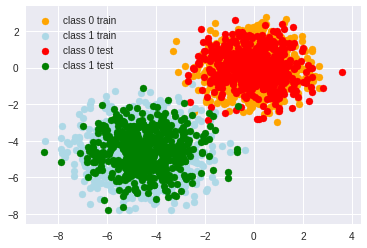

In [0]:
np.random.seed(10)

# generate two classes of samples X_1 and X_2
X_1 =  np.random.randn(1500,2) 
X_2 = 1.2*np.random.randn(1500,2)-4.5

# deviede them into:
# train sets
X_1_train = X_1[:1000, :]
X_2_train = X_2[:1000, :]

# test set
X_1_test = X_1[1000:, :]
X_2_test = X_2[1000:, :]



# X_train is training set used in algorithm
X_train = np.vstack([X_1_train, X_2_train])

# y is a set of tagrets
# first 1000 samples are from class 0
y = np.zeros((2000,1)).reshape(2000,1)  
# last 1000 samples are from class 0
y[ 1000:, 0] = 1

X_test = np.vstack([X_1_test, X_2_test])
print('Shape of training set is  (%i, %i) .'% X_train.shape)
print('Shape of test set is (%i, %i) .'% X_test.shape)
print('Shape of target vector is (%i, %i) .' % y.shape)


# plot train and test set
plt.scatter(X_1_train[:,0], X_1_train[:, 1], label = 'class 0 train', color = 'Orange')
plt.scatter(X_2_train[:,0], X_2_train[:, 1], label = 'class 1 train', color = 'LightBlue')

plt.scatter(X_1_test[:,0], X_1_test[:,1],label = 'class 0 test', color = 'r')
plt.scatter(X_2_test[:,0], X_2_test[:,1], label = 'class 1 test', color = 'g')

plt.legend()
plt.show()
plt.show()

In [0]:
# function for calculating loss

def loss_function(y,a):
    J = -(y * np.log(a) + (1-y)*np.log( 1-a))  
    return J

In [0]:
# function for calculating derivatives

def derivative_calculations(X,y_target, w1, w2, b):
    
    # inicalize values to 0
    dw1 = 0
    dw2 = 0
    db = 0
    J=0
    
    m = X.shape[0] # number od elements in training set
    
    for i in range(m): # go trough examples in training set and calculate derivatives
        zi = w1 * X[i,0] + w2*X[i,1] + b        
        ai = 1 / (1+ np.exp(-zi))        
        J += loss_function(y_target[i,0], ai) 

        dzi = ai - y_target[i,0]        
        dw1 += X[i,0] * dzi  # here we do not need a for loop because we have just two features       
        dw2 += X[i,1] * dzi        
        db += dzi
    
    # find average values
    J/= m
    dw1/=m
    dw2/=m
    db/=m
    
    return dw1, dw2, db, J

In [0]:
# functions that gets optimal values of parameters w and b

def through_iterations(X,y_target, num_it,alpha, w1, w2, b):
    
    # repeat calcualtion of derivatives to find global optimum
    w1_list = []
    w2_list = []
    b_list = []
    J_list = []
    for i in range(num_it):
        dw1, dw2, db, J_cost = derivative_calculations(X,y_target, w1, w2, b)
    
        # update parameters
        w1 = w1 - alpha * dw1 
        w2 = w2 - alpha * dw2
        b = b - alpha * db 
        
        # append value for each iteration
        w1_list.append(w1)
        w2_list.append(w2)
        b_list.append(b)
        J_list.append(J_cost)
    
    return w1_list, w2_list, b_list, J_list

In [0]:
 
n_iterations = 1000
w1_list, w2_list, b_list, J_list = through_iterations(X_train,y, n_iterations,alpha=0.1, w1=0, w2=0, b=0)

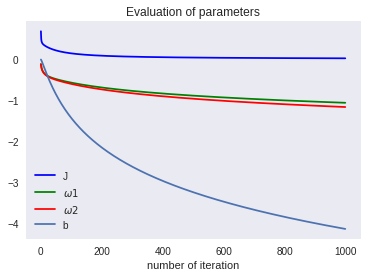

In [0]:
# in the following graphic we will plot values of cost functiona and parameters we got through iterations 

plt.plot(J_list,'b', label = 'J')
plt.plot(w1_list,'g', label ='$\omega1$')
plt.plot(w2_list,'r', label = '$\omega2$')
plt.xlabel('number of iteration')
plt.title('Evaluation of parameters')
plt.plot(b_list, label = 'b');
plt.legend()
plt.grid()
plt.show()

In [0]:
# the last values in w1_list, w1_list and b_list are optimal solutions
w1_final = w1_list[-1]
w2_final = w2_list[-1]
b_final = b_list[-1]
print('w1 from log.reg: %f' %(w1_final))
print('w2 from log.reg: %f' %(w2_final))
print('b from log.reg: %f' %(b_final))

w1 from log.reg: -1.060698
w2 from log.reg: -1.164660
b from log.reg: -4.153168


In [0]:
# sigmoid function

def sigmoid(input):
    s= 1/(1+np.exp(-input))
    return s

In [0]:
# predictions with logistic regression

y_predictions = [] # y_prediction will be a list of all predicted values
z=[]
a=[]

for i in range(len(X_test)):
    
    z_temp  = w1_final*X_test[i,0] + w2_final*X_test[i,1] + b_final
    a_temp =  sigmoid(z_temp) # a_temp = y_hat 
    
    a.append(a_temp)
    z.append(z_temp)
    
    if a_temp > 0.5:
        y_predictions.append(1)
    else:
        y_predictions.append(0)       
        
y_pred = np.array(y_predictions) # we will put predictions in NumPy array because it is easier to manupulate

Here we will use confusion matrix to see a number od misclassified examples. In this case comfusion matrix is 2x2 matrix.

$ confusion\enspace matrix = \begin {bmatrix}
{examples\enspace from \\ class \enspace0\enspace which \enspace are \\ correcty\enspace classified} & {examples\enspace from \\ class\enspace 0\enspace which\enspace are\\  classified\enspace as\enspace class1} \\
{examples\enspace from \\ class\enspace1\enspace which\\ classified\enspace as\enspace class1} & {examples\enspace from \\ class \enspace 1\enspace which\\ are\enspace correctly\enspace classified}
\end {bmatrix} $

In [0]:
y_test = np.zeros((1000,1))
y_test[500:, 0]=1
cm_log_reg  = metrics.confusion_matrix(y_test, y_pred)

cm_log_reg
# we can see that 4 examples are misclassified

array([[497,   3],
       [  1, 499]])

Element from class 0 with index 199 , feature1= -1.736232 and feature2=-2.166129 is misclassified.
Element from class 0 with index 300 , feature1= -1.879757 and feature2=-2.862382 is misclassified.
Element from class 0 with index 321 , feature1= -2.613556 and feature2=-1.879211 is misclassified.
Element from class 1 with index 579 , feature1= -0.667955 and feature2=-2.092435 is misclassified.


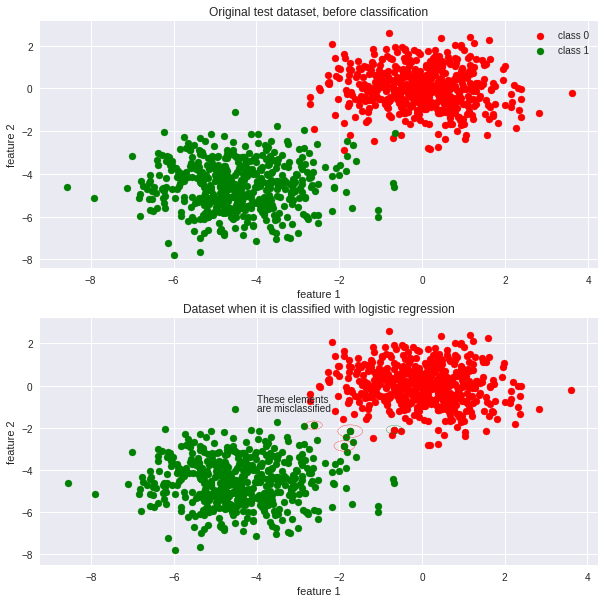

In [0]:
from matplotlib.patches import Circle

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.scatter(X_1_test[:,0], X_1_test[:,1], label = 'class 0', color = 'r')
plt.scatter(X_2_test[:,0], X_2_test[:,1], label = 'class 1', color = 'g')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Original test dataset, before classification')
plt.legend()
            

plt.subplot(2,1,2)
for i in range(0,500):
    plt.scatter(X_test[i,0], X_test[i,1],  color = 'r')
    if y_pred[i] == 1:
        # if example is misclassified
        plt.scatter(X_test[i,0], X_test[i,1], color = 'g')
        print('Element from class 0 with index %i , feature1= %f and feature2=%f is misclassified.'%(i, X_test[i,0], X_test[i,1]))

for i in range(500,1000):
    plt.scatter(X_test[i,0], X_test[i,1],  color = 'g')
    if y_pred[i] == 0:
        # if example is misclassified
        plt.scatter(X_test[i,0], X_test[i,1], color = 'r')
        print('Element from class 1 with index %i , feature1= %f and feature2=%f is misclassified.'%(i, X_test[i,0], X_test[i,1]))
        
                        
    
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Dataset when it is classified with logistic regression')
circle1 = plt.Circle((-1.736232,-2.166129), radius=0.3, color = 'r', fill=False)
circle2 = plt.Circle((-1.879757,-2.862382), radius=0.25, color = 'r', fill=False)
circle3 = plt.Circle((-2.613556,-1.879211), radius=0.2, color = 'r', fill=False)
circle4 = plt.Circle((-0.667955,-2.092435), radius=0.2, color = 'g', fill=False)

plt.text(-4,-0.8, 'These elements')
plt.text(-4,-1.2, 'are misclassified')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
plt.gca().add_patch(circle4)



plt.show()

In [0]:
# LogisticRegression from sklearn

from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(X_train, y.reshape((y.shape[0],))) # it is preferable to use y of this shape
print('Ceoficients of LogisticRegression from sklearn are in (%i,%i) dimensional matrix' %LR.coef_.shape)
w1_skl= LR.coef_[0,0]
w2_skl= LR.coef_[0,1]
b_skl = LR.intercept_


print('w1 = %f'%w1_skl)
print('w2 = %f'%w2_skl)
print('b = %f'%b_skl)
print(cm_log_reg)

Ceoficients of LogisticRegression from sklearn are in (1,2) dimensional matrix
w1 = -1.533146
w2 = -1.721702
b = -6.441244
[[497   3]
 [  1 499]]


In [0]:
# predictions

y_test_sklearn = LR.predict(X_test).reshape(1000,1)

In [0]:
# confusion matrix

cm_sk = metrics.confusion_matrix(y_test, y_test_sklearn)
cm_sk

array([[498,   2],
       [  1, 499]])

Element from class 0 with index 300 , feature1= -1.879757 and feature2=-2.862382 is misclassified.
Element from class 0 with index 321 , feature1= -2.613556 and feature2=-1.879211 is misclassified.
Element from class 1 with index 579 , feature1= -0.667955 and feature2=-2.092435 is misclassified.


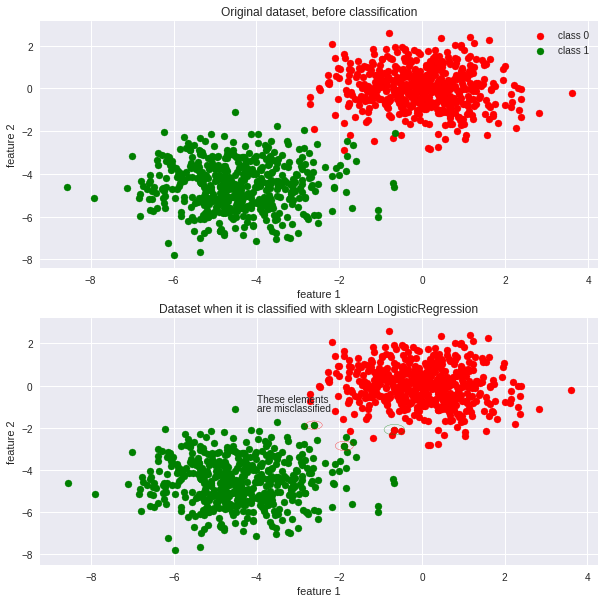

In [0]:
from matplotlib.patches import Circle

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.scatter(X_1_test[:,0], X_1_test[:,1], label = 'class 0', color = 'r')
plt.scatter(X_2_test[:,0], X_2_test[:,1], label = 'class 1', color = 'g')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Original dataset, before classification')
plt.legend()
            

plt.subplot(2,1,2)
for i in range(0,500):
    plt.scatter(X_test[i,0], X_test[i,1],  color = 'r')
    if y_test_sklearn[i] == 1:
        plt.scatter(X_test[i,0], X_test[i,1], color = 'g')
        print('Element from class 0 with index %i , feature1= %f and feature2=%f is misclassified.'%(i, X_test[i,0], X_test[i,1]))
for i in range(500,1000):
    plt.scatter(X_test[i,0], X_test[i,1],  color = 'g')
    if y_test_sklearn[i] == 0:
        plt.scatter(X_test[i,0], X_test[i,1], color = 'r')
        print('Element from class 1 with index %i , feature1= %f and feature2=%f is misclassified.'%(i, X_test[i,0], X_test[i,1]))
                        
    
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Dataset when it is classified with sklearn LogisticRegression')
circle1 = plt.Circle((-1.879757,-2.862382), radius=0.22, color = 'r', fill=False)
circle2 = plt.Circle((-2.613556,-1.879211), radius=0.20, color = 'r', fill=False)
circle3 = plt.Circle((-0.667955,-2.092435), radius=0.25, color = 'g', fill=False)

plt.text(-4,-0.8, 'These elements')
plt.text(-4,-1.2, 'are misclassified')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)


plt.show()

We will now compare these to classifiers.

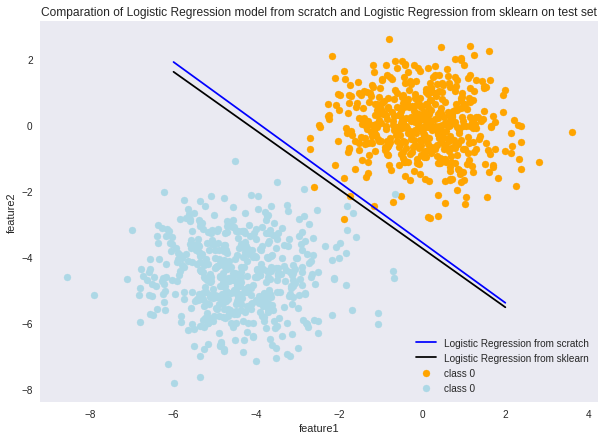

In [0]:
xx = np.linspace(-6,2 )
yy_lr = -(w1_final/w2_final)*xx - b_final/w2_final
yy_sk = -(w1_skl/w2_skl)*xx - b_skl/w2_skl

plt.figure(figsize =(10,7))
plt.scatter(X_1_test[:,0], X_1_test[:,1], label = 'class 0', color = 'Orange')
plt.scatter(X_2_test[:,0], X_2_test[:,1], label = 'class 0',color = 'LightBlue' )
plt.plot(xx, yy_lr, label = 'Logistic Regression from scratch', color = 'b')
plt.plot(xx, yy_sk, label = 'Logistic Regression from sklearn', color = 'k')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Comparation of Logistic Regression model from scratch and Logistic Regression from sklearn on test set')
plt.legend()
plt.grid()
plt.show()


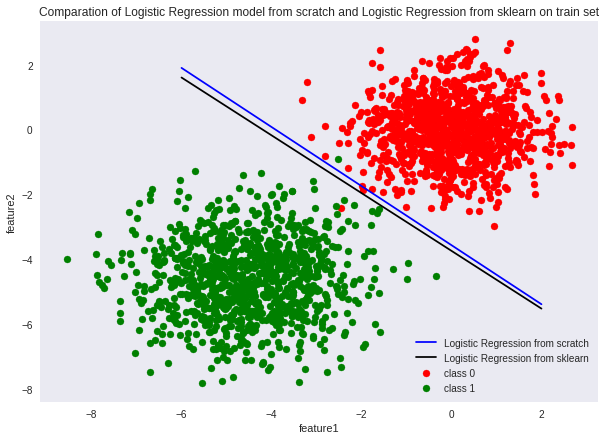

In [0]:
plt.figure(figsize =(10,7))
plt.scatter(X_1_train[:,0], X_1_train[:,1],  label = 'class 0', color = 'r')
plt.scatter(X_2_train[:,0], X_2_train[:,1],  label = 'class 1', color = 'g')
plt.plot(xx, yy_lr, label = 'Logistic Regression from scratch', color = 'b')
plt.plot(xx, yy_sk, label = 'Logistic Regression from sklearn', color = 'k')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Comparation of Logistic Regression model from scratch and Logistic Regression from sklearn on train set')
plt.legend()
plt.grid()
